# Generate moving average charts for stocks to follow

This notebook will envelope the codes in moving-average.ipynb in a `for loop` to iterate over the list of stocks to follow.

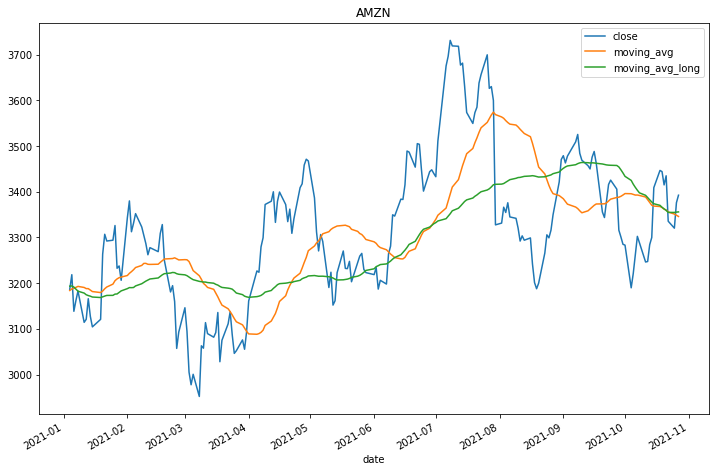

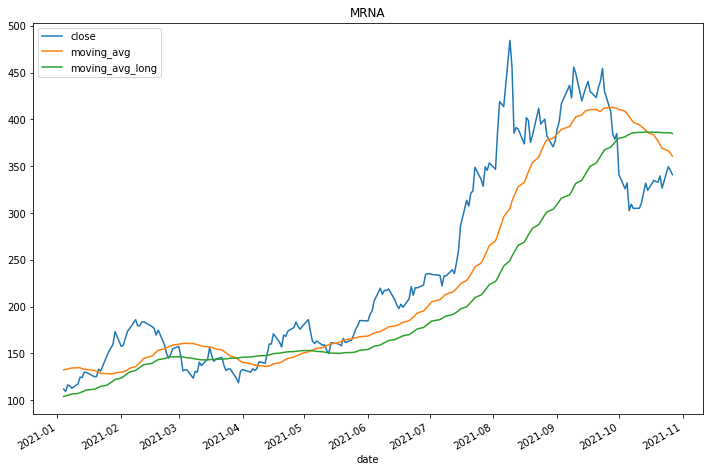

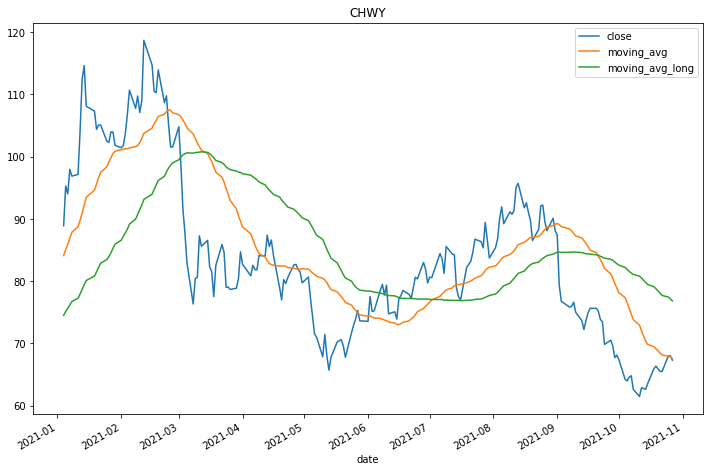

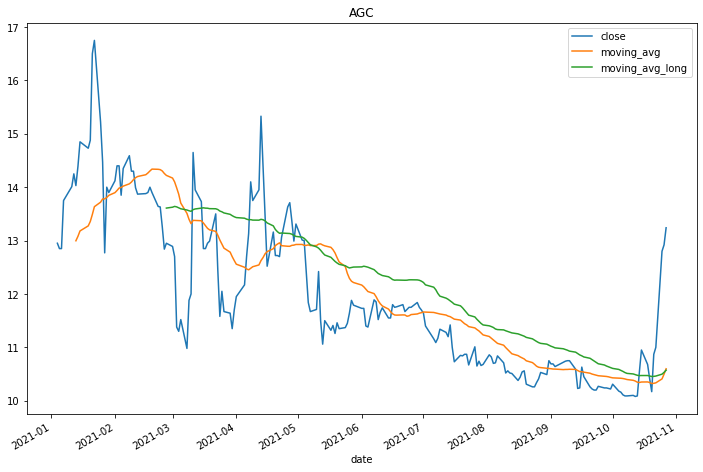

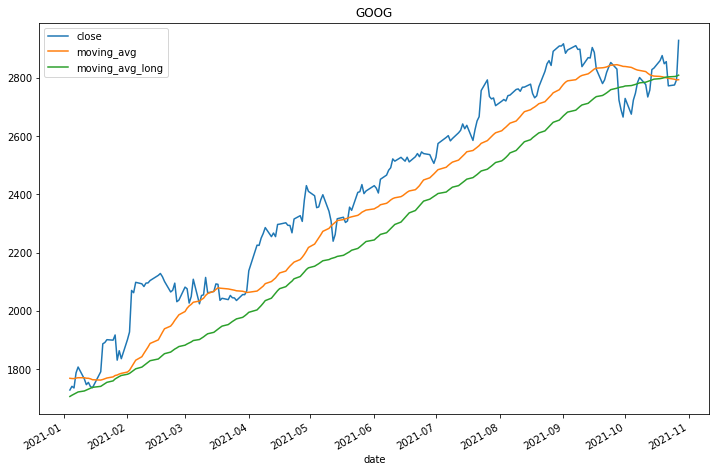

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# import matplotlib.dates as mdates
# from matplotlib.dates import DateFormatter
from alpha_vantage.timeseries import TimeSeries

# accessing with api key
with open('alphavantage_api_key.txt') as file:
    alphavantage_api_key = file.read()
    
# list of variables
stock_list = ['AMZN','MRNA','CHWY','AGC','GOOG']
ma_period = 30 # moving average period in days
ma_period_long = 60

# start of function
def chart_stock(stock_name):
    # using get_daily_adjusted function from the Aplha Vantage API to extract historical daily prices and put it into a data frame
    ts = TimeSeries(key=alphavantage_api_key, output_format='pandas')
    df, meta_data = ts.get_daily_adjusted(stock_name, outputsize='full')

    # sorting the data chronologically
    df.sort_values('date', inplace=True)

    # dropping non-essential columns
    df.drop(columns=['1. open', '2. high', '3. low', '4. close', '6. volume', '7. dividend amount', '8. split coefficient'], inplace=True)

    # renaming column to "close"
    df.rename(columns={'5. adjusted close':'close'}, inplace=True)

    # create moving average column based on the period selected
    df['moving_avg'] = df['close'].rolling(ma_period).mean()

    # create moving average column based on the period selected
    df['moving_avg_long'] = df['close'].rolling(ma_period_long).mean()

    # filtering only data for the period of trading, in this case starting from 2019 onwards
    df_trade = df.loc['2021':, ['close', 'moving_avg', 'moving_avg_long']]
    
    # charting the table
    ax = df_trade.plot(figsize=(12,8))
    ax.set_title(stock_name);

for item in stock_list:
    chart_stock(item)